### quiz1_q3.ipynb

### Purpose: Basic predict (most frequent class) and assess train accuracy

### Author: Alexandre Kanouni

### Contents: 
 - Start_. Packages
 - 1. Read the data
 


### Start_. Import required packages


In [1]:
#admin
import os

#data manipulation
import numpy as np
import pandas as pd

#graphs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/home/jovyan/Projects/MNIST/PCode'

### 1. Read the data

In [3]:
df_train = pd.read_csv('../input/train.csv')

### 2. Look at the data

In [4]:
df_train.shape

(42000, 785)

In [5]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.loc[0][df_train.loc[0] > 0] #show non-zero entries

label         1
pixel132    188
pixel133    255
pixel134     94
pixel159    191
pixel160    250
pixel161    253
pixel162     93
pixel186    123
pixel187    248
pixel188    253
pixel189    167
pixel190     10
pixel213     80
pixel214    247
pixel215    253
pixel216    208
pixel217     13
pixel240     29
pixel241    207
pixel242    253
pixel243    235
pixel244     77
pixel267     54
pixel268    209
pixel269    253
pixel270    253
pixel271     88
pixel294     93
pixel295    254
           ... 
pixel487    253
pixel488    245
pixel489     93
pixel513    103
pixel514    253
pixel515    253
pixel516    191
pixel540     89
pixel541    240
pixel542    253
pixel543    195
pixel544     25
pixel567     15
pixel568    220
pixel569    253
pixel570    253
pixel571     80
pixel595     94
pixel596    253
pixel597    253
pixel598    253
pixel599     94
pixel623     89
pixel624    251
pixel625    253
pixel626    250
pixel627    131
pixel652    214
pixel653    218
pixel654     95
Name: 0, Length: 98, dty

In [8]:
df_temp = df_train['label'].value_counts().reset_index()
df_temp.sort_values('index', inplace = True)
df_temp.columns = ['label', 'count']
df_temp.reset_index(drop=True)
df_temp

,label,count
6,0,4132
0,1,4684
4,2,4177
2,3,4351
7,4,4072
9,5,3795
5,6,4137
1,7,4401
8,8,4063
3,9,4188


In [9]:
df_temp['label']=df_temp['label'].astype(str)
df_temp.dtypes

label    object
count     int64
dtype: object

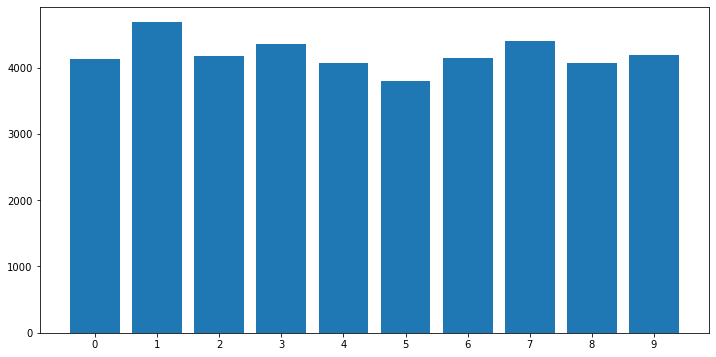

In [10]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1)
ax.bar(x=df_temp['label'],height=df_temp['count'])
_=ax.set_xticks(df_temp['label'])

can do something similar using built in pandas plot

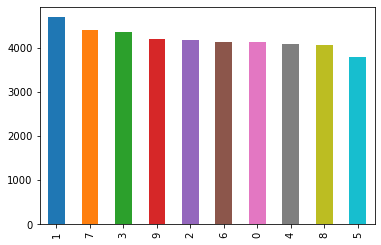

In [11]:
df_train['label'].value_counts().plot(kind='bar')

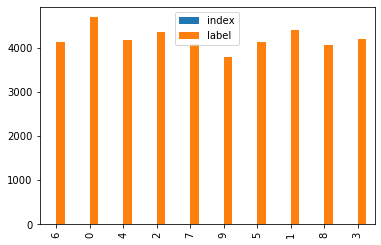

In [12]:
df_temp2 = df_train['label'].value_counts().reset_index()
df_temp2.sort_values('index',inplace = True)
df_temp2
df_temp2.plot(kind='bar')

Text(0.5, 1.0, '1')

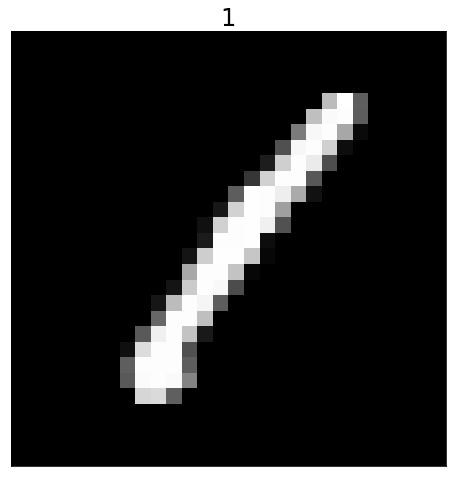

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xticks([])
ax.set_yticks([])
pixels = df_train.iloc[0, 1:786].values.reshape((28,28))
ax.imshow(pixels, cmap='gray') #plot pixels in grayscale cmap
ax.set_title(df_train.iloc[0]['label'],fontsize=24) #label it in case cant identify

In [14]:
# PLOT MULTIPLE IMAGES, put fig plot into loop
np.random.seed(seed=2020) #to force reproducability, fix seed
n=6
images = np.random.randint(low=0,high=42001,size=n)
images #see which images to plot (should always be same if using same seed)

array([41824, 40259, 18523,  1661, 32387, 20039])

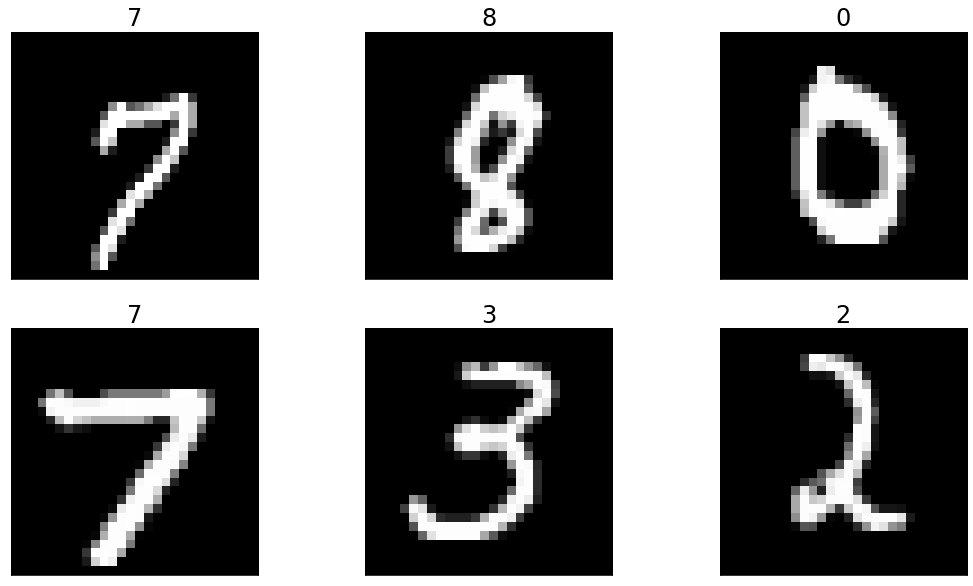

In [15]:
#same as for single image but looped to plot multiple images
fig = plt.figure(figsize=(18,10))

for idx, row in enumerate(images):
    ax = fig.add_subplot(2,3,idx+1) #2x3 subplot to plot all 6 images, plot each in position index+1
    ax.set_xticks([])
    ax.set_yticks([])
    pixels = df_train.iloc[row, 1:786].values.reshape((28,28))#location changes on each loop, determined by row
    ax.imshow(pixels, cmap='gray')
    ax.set_title(df_train.iloc[row]['label'],fontsize=24) #plot on top of each image what the number actually is, in case can't recognise it ourselves

In [16]:
# pixels

In [17]:
### indexing into dataframes

In [18]:
df_temp

,label,count
6,0,4132
0,1,4684
4,2,4177
2,3,4351
7,4,4072
9,5,3795
5,6,4137
1,7,4401
8,8,4063
3,9,4188


### PREDICTION: MOST FREQUENT CLASS
- Since df_temp already gives each label's frequency, sort by value of count (in descending order) and select first row as this is the most frequent 

In [19]:
df_temp["count"].max() # just checking that sort (later) is correctly identifiying the most frequent 

4684

In [20]:
# i=0
# while i<len(df_temp):
# # if df_temp["count"]=df_temp["count"].max():
# #     most_freq = df_temp["count"]
# # print(df_temp["label"][df_temp])
#     print(df_temp.iloc[i])
#     i+=1

In [21]:
# sort df_temp by count, in descending order
df_temp.sort_values('count',inplace = True, ascending = False)

In [22]:
df_temp

,label,count
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


In [23]:
imageId = df_train.index.tolist()
# imageId

In [24]:
most_freq=df_temp.iloc[0]["label"]
print(most_freq) #double check that correct label is identified

1


In [25]:
### HAVING IDENTIFIED MOST FREQUENT LABEL, predict majority class i.e. predict this label for all images

In [26]:
df_q3 = pd.DataFrame({
    "ImageId":imageId,
    "Label": most_freq
})

In [27]:
df_q3

,ImageId,Label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


In [28]:
df_q3['Label']=df_q3['Label'].astype(int) #convert Label entries from strings to ints (for comparison later on)
df_q3.dtypes

ImageId    int64
Label      int64
dtype: object

In [29]:
df_train.loc[2]["label"]

1

In [30]:
### COMPARE VS ACTUAL LABEL to get train accuracy
i=0
incorrect = 0
while i < len(df_train):
# while i < 100:

    if df_train.iloc[i]["label"] != df_q3.iloc[i]["Label"]: #incorrect prediction
        ## count number of incorrect preditions
        incorrect+=1
        print("wrong")
    else:
        print("correct")
    i+=1



correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wron

wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
co

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wron

wrong
wrong
correct
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wr

wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
wron

correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wron

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wr

wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
corr

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wron

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wr

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong


correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
correct
wrong
wrong
wrong
correct
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wr

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wron

wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wr

wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correc

wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong


wrong
wrong
wrong
correct
correct
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong


wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wr

correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
corr

wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
correct
wrong


correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong


wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wron

wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct


wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wron

wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
correct
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wr

wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
correct
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong


correct
correct
wrong
correct
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wr

wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
co

wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
correct
wrong
wrong
correct
wrong
correct
wrong
correct
wrong
wrong
wrong
wrong
wrong


wrong
wrong
correct
wrong
wrong
wrong
wrong
correct
wrong
wrong
wrong


In [31]:
print("total:", len(df_train)) 
print("incorrect:", incorrect)
accuracy = 1-(incorrect/len(df_train))
print("Accuracy:",accuracy)

total: 42000
incorrect: 37316
Accuracy: 0.11152380952380947


In [32]:
df_q3.to_csv('../POutput/df_q3.csv', index=False)

42000